# Test training for cx population

In [1]:
# Import libraries
import nest
import matplotlib.pyplot as plt
import seaborn as sns
from model.network import Network


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.4
 Built: Jul 22 2023 00:00:00

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
# Instantiate network
net = Network(180)

In [3]:
# Connect to multimeters and spike records
net.connect_all_devices()

In [4]:
# Train cx population
SET_NEURONS = 20
"""
for i in range(1, net.cx_n//SET_NEURONS):
    if i == 1:
        net.input_context_signal(i)
        nest.Simulate(900.0)
    else:
        net.disconnect_input(net.context_sign, i-1)
        net.input_context_signal(i)
        nest.Simulate(900.0)
    
    print(f"Run {i}.")
"""

'\nfor i in range(1, net.cx_n//SET_NEURONS):\n    if i == 1:\n        net.input_context_signal(i)\n        nest.Simulate(900.0)\n    else:\n        net.disconnect_input(net.context_sign, i-1)\n        net.input_context_signal(i)\n        nest.Simulate(900.0)\n    \n    print(f"Run {i}.")\n'

In [5]:
net.input_context_signal(1)
nest.Simulate(900.0)

net.input_context_signal(2)
nest.Simulate(900.0)

Generating contextual signal...
... done.
Connecting input to the cx population...
... contextual signal successfully connected to the cx population.
Generating contextual signal...
... done.
Connecting input to the cx population...
... contextual signal successfully connected to the cx population.

Jan 25 17:53:47 NodeManager::prepare_nodes [Info]: 
    Preparing 913 nodes for simulation.

Jan 25 17:53:47 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 913
    Simulation time (ms): 900
    Number of OpenMP threads: 1
    Not using MPI

Jan 25 17:53:55 SimulationManager::run [Info]: 
    Simulation finished.

Jan 25 17:53:55 NodeManager::prepare_nodes [Info]: 
    Preparing 914 nodes for simulation.

Jan 25 17:53:55 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 914
    Simulation time (ms): 900
    Number of OpenMP threads: 1
    Not using MPI

Jan 25 17:54:04 SimulationManager::run [Info]: 
    Simulation finished.


In [6]:
# Get events from multimeter
cx_vm = net.mult_cx.get()
vm_cx = cx_vm["events"]["V_m"]
ts_vm_cx = cx_vm["events"]["times"]

# Get events from spike recorder
cx_spike = net.spikes_cx.get("events")
send_cx = cx_spike["senders"]
ts_spike_cx = cx_spike["times"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


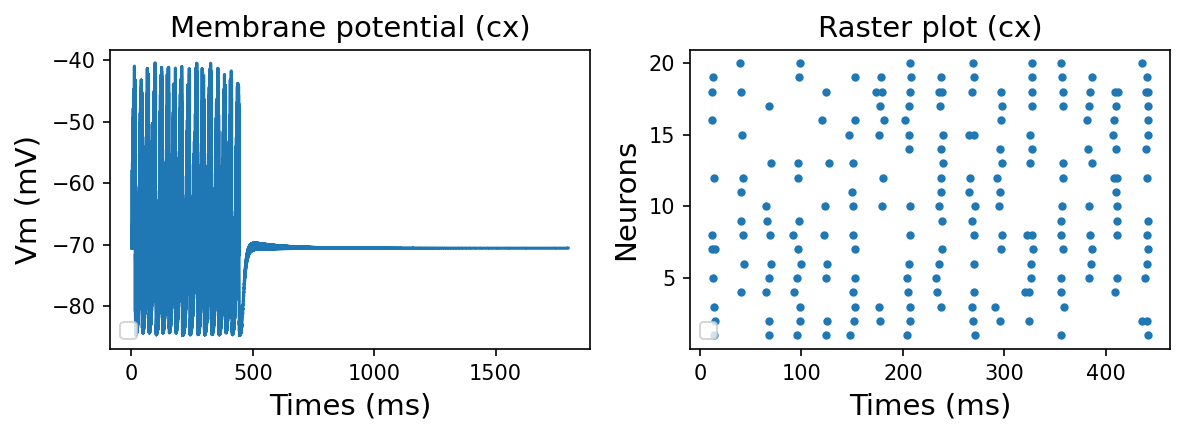

In [7]:
# Plot results

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, dpi=150, figsize=(8, 3), sharey=False)

axs[0].plot(ts_vm_cx, vm_cx)
axs[0].set_title('Membrane potential (cx)', size=14)
axs[0].legend(loc=3)
axs[0].set_xlabel("Times (ms)", size=14)
axs[0].set_ylabel("Vm (mV)", size=14)  # Fixed the ylabel, and "mV" is commonly used for millivolts

axs[1].plot(ts_spike_cx, send_cx, '.')
axs[1].set_title('Raster plot (cx)', size=14)
axs[1].legend(loc=3)
axs[1].set_xlabel("Times (ms)", size=14)
#axs[1].set_xlim([0, 4500.0])
#axs[1].set_ylim([0, 180])
axs[1].set_ylabel("Neurons", size=14)

# Adjust layout for better spacing
plt.tight_layout()

# Show the subplot
#sns.despine()
plt.show()

In [8]:
def create_context_signal():
        """
        Every time a new training image is presented to the network through the thalamic pathway, the facilitation signal 
        coming from the contextual signal provides a 2 kHz Poisson spike train to a different set of 20 neurons, inducing 
        the group to encode for that specific input stimulus.
        
        Turned off during the retrieval phase.
        
        :param neuron_group_id: Parameter that defines the slicing of the cx population. For example, neuron_group_id=1 slices 
                                from 0:20; neuron_group_id=2 slices from 20:40.
        :param type: int
        """
        # Declare variables
        CONTEXT_RATE = 2000.0        # Hz
        SIGN_DUR = 450               # Duration of contextual signal in ms   
        
        # Generate contextual signal
        print("Generating contextual signal...")
        context_sign = nest.Create("poisson_generator")
        
        # Set frequencies
        context_sign.set(rate=CONTEXT_RATE, stop=SIGN_DUR)
        print("... done.")
        
        return context_sign

In [9]:
cont_1 = create_context_signal()

Generating contextual signal...
... done.


In [12]:
cont_2 = create_context_signal()
cont_2.get()

Generating contextual signal...
... done.


{'element_type': 'stimulator',
 'frozen': False,
 'global_id': 916,
 'label': '',
 'local': True,
 'model': 'poisson_generator',
 'model_id': 39,
 'node_uses_wfr': False,
 'origin': 0.0,
 'rate': 2000.0,
 'start': 0.0,
 'stimulus_source': '0',
 'stop': 450.0,
 'thread': 0,
 'thread_local_id': -1,
 'vp': 0}

In [11]:
cont_1.get()

{'element_type': 'stimulator',
 'frozen': False,
 'global_id': 915,
 'label': '',
 'local': True,
 'model': 'poisson_generator',
 'model_id': 39,
 'node_uses_wfr': False,
 'origin': 0.0,
 'rate': 2000.0,
 'start': 0.0,
 'stimulus_source': '0',
 'stop': 450.0,
 'thread': 0,
 'thread_local_id': -1,
 'vp': 0}